In [1]:
%pip install tensorflow
import tensorflow as tf
# Import the numpy package (math, arrays, etc.)
import numpy as np
# Matplotlib for graphing
import matplotlib.pyplot as plt
# Math functions
import math


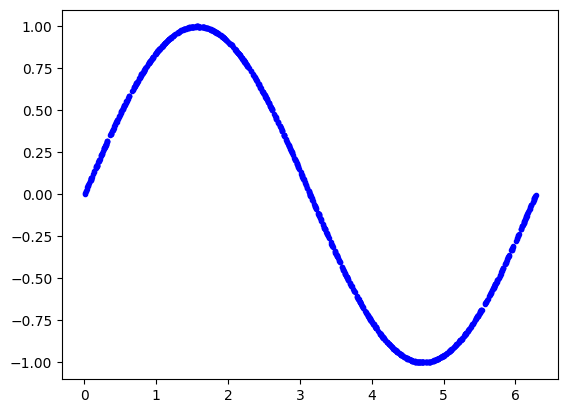

In [2]:
# Generate Sine Wave
SAMPLES = 1000

# Set a "seed" for the random number generator each time the code is run
SEED = 1337
# Set the random seed for numpy and tensorflow
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate random values for x in a complete cycle of a sine wave
x_values = np.random.uniform(low=0, high=2*np.pi, size=SAMPLES)

# Shuffle the values to guarantee they are in random order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot data
plt.plot(x_values, y_values, 'b.')
plt.show()

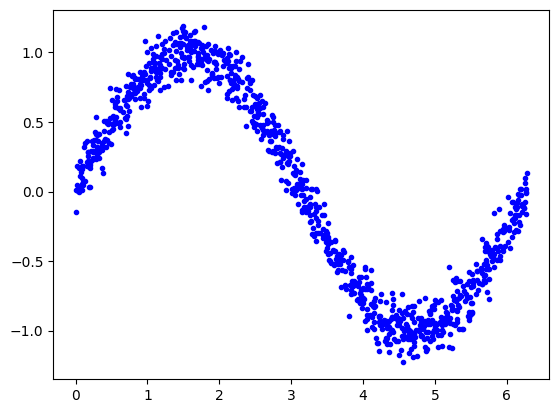

In [3]:
# Add some noise to the data for each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot data
plt.plot(x_values, y_values, 'b.')
plt.show()

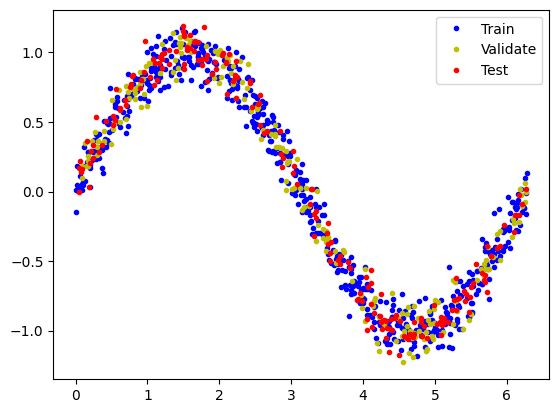

In [4]:
# 60% of the data will be used for training and 20% for testing and 20% for validation
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Split the data into training, validation, and test sets
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Verify the size of the partitions
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()


In [5]:
# Use Keras to build a neural network
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# Add the first dense layer with 16 units and ReLU activation that receives a single value as input and pass it on 16 neurons to try to find the non-linear relationship in the data
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since the output is a single value
model_1.add(layers.Dense(1))

# Compile the model
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print summary of the model architecture
model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history_1 = model_1.fit(
    x_train, 
    y_train,
    epochs=1000,
    batch_size=16,
    validation_data=(x_validate, y_validate)
)

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.5815 - mae: 0.6794 - val_loss: 0.4710 - val_mae: 0.6063
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4198 - mae: 0.5689 - val_loss: 0.4177 - val_mae: 0.5628
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3789 - mae: 0.5346 - val_loss: 0.3815 - val_mae: 0.5344
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3469 - mae: 0.5117 - val_loss: 0.3493 - val_mae: 0.5090
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3182 - mae: 0.4901 - val_loss: 0.3204 - val_mae: 0.4865
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2925 - mae: 0.4704 - val_loss: 0.2948 - val_mae: 0.4662
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2699 - mae: 0.4534 - val_loss: 0.2725 - val_mae: 0.4488
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2504 - mae: 0.4391 - val_loss: 0.2537 - val_mae: 0.4347
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

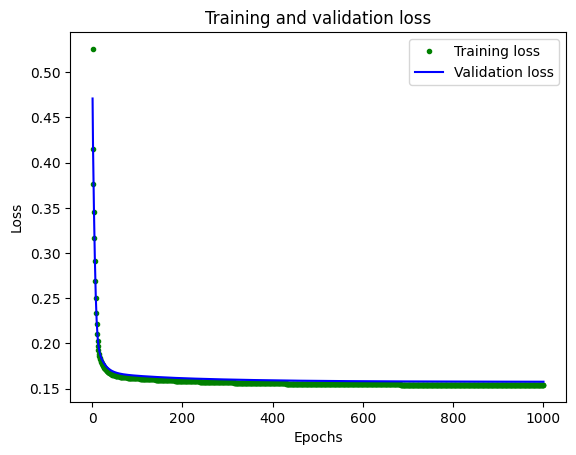

In [7]:
# Plot loss and val_loss
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

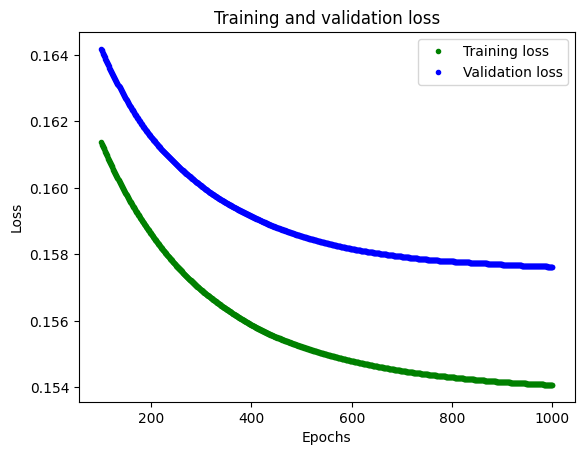

In [8]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


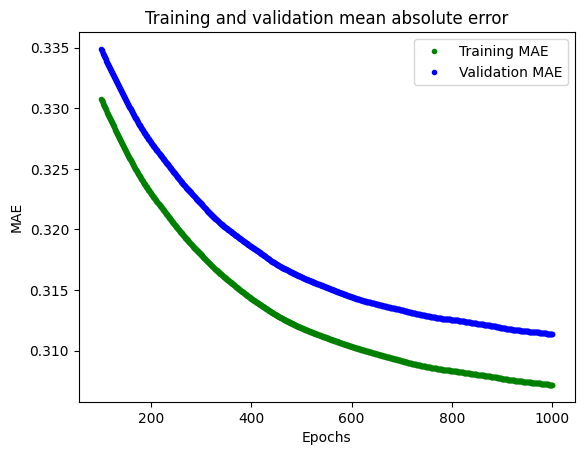

In [9]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


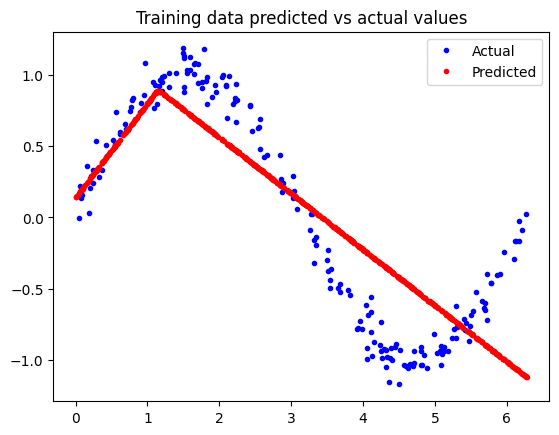

In [10]:
# Use the model to make predictions from the training data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()



In [11]:
# Create a model to help the model learn non-linear relationships
model_2 = tf.keras.Sequential()
# Add the first dense layer with 16 units and ReLU activation that receives a single value as input and pass it on 16 neurons to try to find the non-linear relationship in the data
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# LAst model stopped improving at epoch 600
history_2 = model_2.fit(
    x_train, 
    y_train, 
    epochs=600, 
    batch_size=16,
 validation_data=(x_validate, y_validate))


Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.5023 - mae: 0.5907 - val_loss: 0.3779 - val_mae: 0.5318
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3400 - mae: 0.5063 - val_loss: 0.3208 - val_mae: 0.4872
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2898 - mae: 0.4684 - val_loss: 0.2729 - val_mae: 0.4491
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2485 - mae: 0.4348 - val_loss: 0.2362 - val_mae: 0.4182
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2174 - mae: 0.4082 - val_loss: 0.2102 - val_mae: 0.3949
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1961 - mae: 0.3869 - val_loss: 0.1933 - val_mae: 0.3786
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1827 - mae: 0.3712 - val_loss: 0.1828 - val_mae: 0.3663
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1747 - mae: 0.3599 - val_loss: 0.1764 - val_mae: 0.3578
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.16

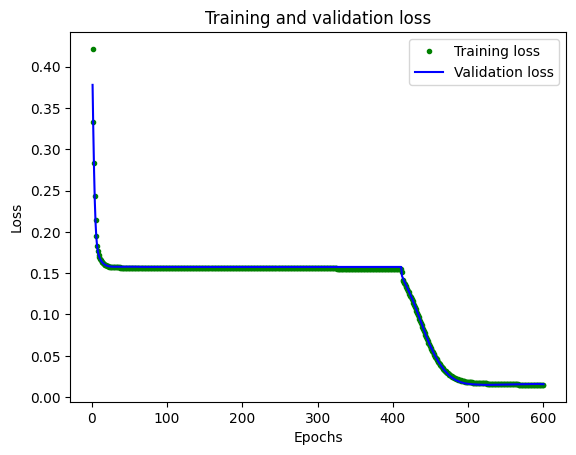

In [13]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


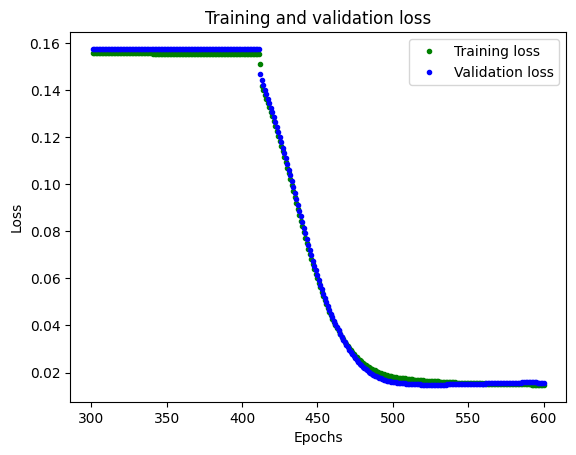

In [14]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 300
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

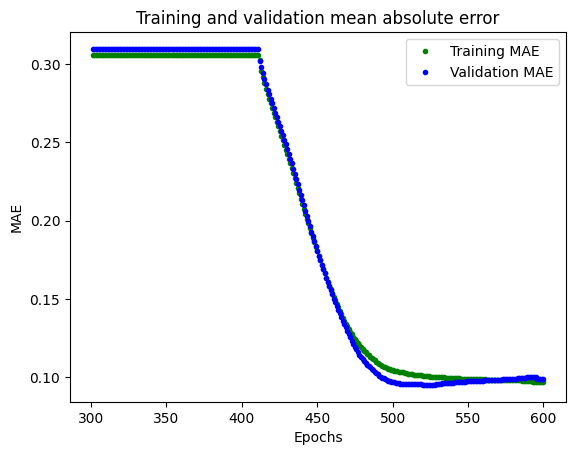

In [15]:
plt.clf()
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mae: 0.0857  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


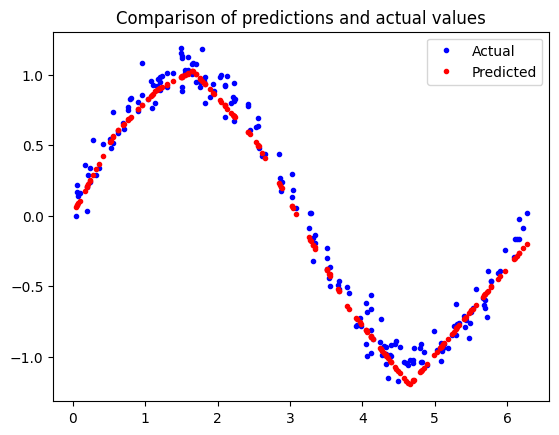

In [16]:
# Calculate and print the loss of test dataset
loss = model_2.evaluate(x_test, y_test)

# Make predictions based on test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()



In [17]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
 for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()
# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)



Saved artifact at '/tmp/tmp9kxsq1ce'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  131978234796304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131978234798992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131978234790352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131978234790736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131978234795728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131978234800528: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmpt7au8tqq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  131978234796304: TensorSpe

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


3808

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


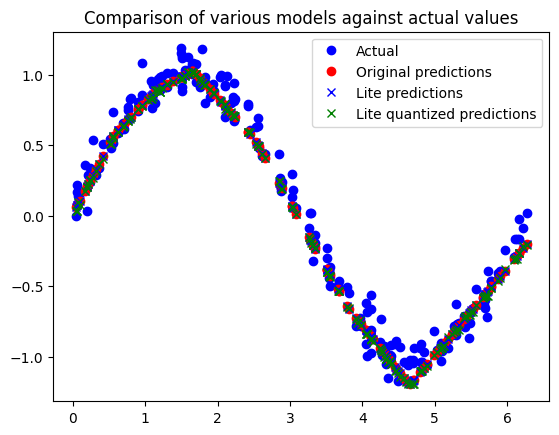

In [18]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]

# FIX: Ensure ["index"] is accessed on the same line or properly chained
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
    # Create a 2D tensor wrapping the current x value
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)

    # Write the value to the input tensor
    sine_model.set_tensor(sine_model_input_index, x_value_tensor)
    sine_model.invoke()
    sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

    # Do the same for the quantized model
    sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
    sine_model_quantized.invoke()
    sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

# See how they line up with the data
import matplotlib.pyplot as plt

plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
# Assuming 'predictions' exists from previous steps (your original Keras model)
plt.plot(x_test, predictions, 'ro', label='Original predictions') 
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

In [19]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)


Basic model is 3180 bytes
Quantized model is 3808 bytes
Difference is -628 bytes


In [20]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc


unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0x0c, 0x01, 0x00, 0x00,
  0x00, 0x04, 0x00, 0x00, 0x10, 0x04, 0x00, 0x00, 0x54, 0x0e, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xae, 0xfb, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x68, 0xff, 0xff, 0xff,
  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x6f, 0x75, 0x74, 0x70, 0x75, 0x74, 0x5f, 0x30, 0x00, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x86, 0xfc, 0x